In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
"""
信用卡违约率检测
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset
对信用卡使用数据进行建模，预测用户是否下个月产生违约
可使用GridSearchCV工具，找到每个分类器的最优参数和最优分数，
最终找到最适合数据集的分类器和此分类器的参数
"""
# 加载数据
data = pd.read_csv('./UCI_Credit_Card.csv')

In [3]:
#查看数据
print(data.head())
print(data.shape)
print(data.columns)

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [4]:
# 查看下一个月违约情况
next_month = data['default.payment.next.month'].value_counts()
print(next_month)

0    23364
1     6636
Name: default.payment.next.month, dtype: int64


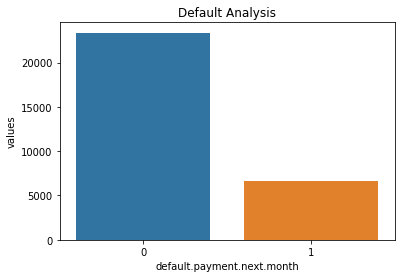

In [5]:
#可视化标签
df = pd.DataFrame({'default.payment.next.month' : next_month.index,'values' : next_month.values})

plt.title('Default Analysis')
sns.barplot(x = 'default.payment.next.month',y = 'values',data = df)
plt.show()

In [6]:
#数据处理
target = data['default.payment.next.month'].values
data.drop(['ID','default.payment.next.month'],axis = 1,inplace = True)
columns = data.columns.tolist()
features = data[columns].values

In [7]:
# GridSearchCV
def GridSearchCV_work(pipline,train_X,train_y,test_X,test_y,model_param_grid,score = 'accuracy'):
    gridsearch = GridSearchCV(estimator = pipline,param_grid = model_param_grid,scoring =score)
    #寻找最优参数
    search = gridsearch.fit(train_X,train_y)
    predict_y = search.predict(test_X)
    print('GridSearch最优参数：',search.best_params_)
    print('GridSearch最优score:',search.best_score_)
    print('准确率 %0.4lf' %accuracy_score(test_y,predict_y))

In [8]:
# 切分数据,70%训练集，30%测试集
train_X,test_X,train_y,test_y = train_test_split(features,target,test_size = 0.3)

# 构建分类器
classifiers = [SVC(),
             DecisionTreeClassifier(),
             RandomForestClassifier(),
             KNeighborsClassifier()]

# 分类器名称
classifier_names = ['svc','decisiontreeclassifier','randomforestclassifier','kneighborsclassifier']

#分类器参数
classifier_param_grid = [{'svc__C':[1],'svc__gamma' : [0.01]},
                        {'decisiontreeclassifier__max_depth': [6,9,11]},
                        {'randomforestclassifier__n_estimators' : [3,5,6]},
                        {'kneighborsclassifier__n_neighbors': [4,6,8]} ]

for model,model_name,model_param_grid in zip(classifiers,classifier_names,classifier_param_grid):
    pipeline = Pipeline([('scaler',StandardScaler()),
                        (model_name,model)])    
    result = GridSearchCV_work(pipeline,train_X,train_y,test_X,test_y,model_param_grid)

GridSearch最优参数： {'svc__C': 1, 'svc__gamma': 0.01}
GridSearch最优score: 0.8168095238095239
准确率 0.8208
GridSearch最优参数： {'decisiontreeclassifier__max_depth': 6}
GridSearch最优score: 0.8179047619047619
准确率 0.8214
GridSearch最优参数： {'randomforestclassifier__n_estimators': 6}
GridSearch最优score: 0.7976666666666665
准确率 0.7997
GridSearch最优参数： {'kneighborsclassifier__n_neighbors': 8}
GridSearch最优score: 0.8002380952380953
准确率 0.8060
